CONCLUSION SO FAR: MOST OF THE TENDANCY TOWARDS TARGET = 0 here is due to missing values, which skew towards TARGET = 1. so my null counts features should account for this. 
There may be more information here, but it seems pretty slight. 

In [4]:
import pandas as pd

import numpy as np

#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', #mostly controls relative sizes of things on plot #The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”
        style = 'darkgrid', #dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        palette = 'deep', # Should be something that color_palette() can process.
        font_scale = 1, 
        color_codes = False, 
        rc = None)

# from IPython.core.interactiveshell import InteractiveShell 
# InteractiveShell.ast_node_interactivity = 'last_expr' #s etting = "all" allows multiple outputs to be displayed for a given input cell. don't use w plotting!

from IPython.display import display

%matplotlib notebook
#%matplotlib inline

pd.__version__, sns.__version__ , np.__version__ #,  matplotlib.__version__

('0.23.3', '0.9.0', '1.14.2')

In [5]:
# some functions to load

def head_with_full_columns(pd_in, row_amount = 5):
    with pd.option_context('display.max_columns', len(pd_in.iloc[0])):
        display(pd_in[:row_amount])
        
def balanced_sample(df_in, total_size, rand_state):
    s0 = df_in[df_in['TARGET']==0].sample(n = total_size//2, random_state = rand_state)
    s1 = df_in[df_in['TARGET']==1].sample(n = total_size//2, random_state = rand_state)
    new_df = pd.concat([s0,s1])
    new_df.sort_index(inplace = True)
    return new_df

## load df and features to keep for this notebook

In [6]:
feats_to_keep = ['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
# 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
# 'AMT_INCOME_TOTAL',
# 'AMT_CREDIT',
# 'AMT_ANNUITY',
# 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
# 'NAME_INCOME_TYPE',
# 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
# 'DAYS_BIRTH',
# 'DAYS_EMPLOYED',
# 'DAYS_REGISTRATION',
# 'DAYS_ID_PUBLISH',
# 'OWN_CAR_AGE',
# 'FLAG_MOBIL',
#  'FLAG_EMP_PHONE',
#  'FLAG_WORK_PHONE',
#  'FLAG_CONT_MOBILE',
#  'FLAG_PHONE',
#  'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
#  'WEEKDAY_APPR_PROCESS_START',
#  'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
#  'ORGANIZATION_TYPE',
#  'EXT_SOURCE_1',
#  'EXT_SOURCE_2',
#  'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
#  'OBS_30_CNT_SOCIAL_CIRCLE',
#  'DEF_30_CNT_SOCIAL_CIRCLE',
#  'OBS_60_CNT_SOCIAL_CIRCLE',
#  'DEF_60_CNT_SOCIAL_CIRCLE',
#  'DAYS_LAST_PHONE_CHANGE',
#  'FLAG_DOCUMENT_2',
#  'FLAG_DOCUMENT_3',
#  'FLAG_DOCUMENT_4',
#  'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6',
#  'FLAG_DOCUMENT_7',
#  'FLAG_DOCUMENT_8',
#  'FLAG_DOCUMENT_9',
#  'FLAG_DOCUMENT_10',
#  'FLAG_DOCUMENT_11',
#  'FLAG_DOCUMENT_12',
#  'FLAG_DOCUMENT_13',
#  'FLAG_DOCUMENT_14',
#  'FLAG_DOCUMENT_15',
#  'FLAG_DOCUMENT_16',
#  'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18',
#  'FLAG_DOCUMENT_19',
#  'FLAG_DOCUMENT_20',
#  'FLAG_DOCUMENT_21',
#  'AMT_REQ_CREDIT_BUREAU_HOUR',
#  'AMT_REQ_CREDIT_BUREAU_DAY',
#  'AMT_REQ_CREDIT_BUREAU_WEEK',
#  'AMT_REQ_CREDIT_BUREAU_MON',
#  'AMT_REQ_CREDIT_BUREAU_QRT',
#  'AMT_REQ_CREDIT_BUREAU_YEAR'
                ]

In [5]:
# housing_feats = ['TARGET',
#  'CODE_GENDER',
#  'FLAG_OWN_REALTY',
#  'NAME_HOUSING_TYPE',
#  'REGION_RATING_CLIENT',
#  'REGION_RATING_CLIENT_W_CITY',
#  'REG_REGION_NOT_LIVE_REGION',
#  'REG_REGION_NOT_WORK_REGION',
#  'LIVE_REGION_NOT_WORK_REGION',
#  'REG_CITY_NOT_LIVE_CITY',
#  'REG_CITY_NOT_WORK_CITY',
#  'LIVE_CITY_NOT_WORK_CITY',
#  'APARTMENTS_AVG',
#  'BASEMENTAREA_AVG',
#  'YEARS_BEGINEXPLUATATION_AVG',
#  'YEARS_BUILD_AVG',
#  'COMMONAREA_AVG',
#  'ELEVATORS_AVG',
#  'ENTRANCES_AVG',
#  'FLOORSMAX_AVG',
#  'FLOORSMIN_AVG',
#  'LANDAREA_AVG',
#  'LIVINGAPARTMENTS_AVG',
#  'LIVINGAREA_AVG',
#  'NONLIVINGAPARTMENTS_AVG',
#  'NONLIVINGAREA_AVG',
#  'APARTMENTS_MODE',
#  'BASEMENTAREA_MODE',
#  'YEARS_BEGINEXPLUATATION_MODE',
#  'YEARS_BUILD_MODE',
#  'COMMONAREA_MODE',
#  'ELEVATORS_MODE',
#  'ENTRANCES_MODE',
#  'FLOORSMAX_MODE',
#  'FLOORSMIN_MODE',
#  'LANDAREA_MODE',
#  'LIVINGAPARTMENTS_MODE',
#  'LIVINGAREA_MODE',
#  'NONLIVINGAPARTMENTS_MODE',
#  'NONLIVINGAREA_MODE',
#  'APARTMENTS_MEDI',
#  'BASEMENTAREA_MEDI',
#  'YEARS_BEGINEXPLUATATION_MEDI',
#  'YEARS_BUILD_MEDI',
#  'COMMONAREA_MEDI',
#  'ELEVATORS_MEDI',
#  'ENTRANCES_MEDI',
#  'FLOORSMAX_MEDI',
#  'FLOORSMIN_MEDI',
#  'LANDAREA_MEDI',
#  'LIVINGAPARTMENTS_MEDI',
#  'LIVINGAREA_MEDI',
#  'NONLIVINGAPARTMENTS_MEDI',
#  'NONLIVINGAREA_MEDI',
#  'FONDKAPREMONT_MODE',
#  'HOUSETYPE_MODE',
#  'TOTALAREA_MODE',
#  'WALLSMATERIAL_MODE',
#  'EMERGENCYSTATE_MODE',
# ]

In [7]:
application_train_df = pd.read_csv('application_train.csv', index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 
f_list = list(application_train_df.select_dtypes('object').columns)
application_train_df[f_list] = application_train_df[f_list].fillna(value = 'NA')
application_train_df = application_train_df[feats_to_keep]
del f_list

## basic info - a lot of these are missing values. 

In [37]:
application_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 59 columns):
TARGET                          307511 non-null int64
CODE_GENDER                     307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_RATING_CLIENT            307511 non-null int64
REGION_RATING_CLIENT_W_CITY     307511 non-null int64
REG_REGION_NOT_LIVE_REGION      307511 non-null int64
REG_REGION_NOT_WORK_REGION      307511 non-null int64
LIVE_REGION_NOT_WORK_REGION     307511 non-null int64
REG_CITY_NOT_LIVE_CITY          307511 non-null int64
REG_CITY_NOT_WORK_CITY          307511 non-null int64
LIVE_CITY_NOT_WORK_CITY         307511 non-null int64
APARTMENTS_AVG                  151450 non-null float64
BASEMENTAREA_AVG                127568 non-null float64
YEARS_BEGINEXPLUATATION_AVG     157504 non-null float64
YEARS_BUILD_AVG                 103023 non-null float64
COMMONARE

In [40]:
application_train_df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [39]:
application_train_df['HOUSETYPE_MODE'].value_counts()

NA                  154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [42]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(application_train_df, 24000, 0)

<IPython.core.display.Javascript object>


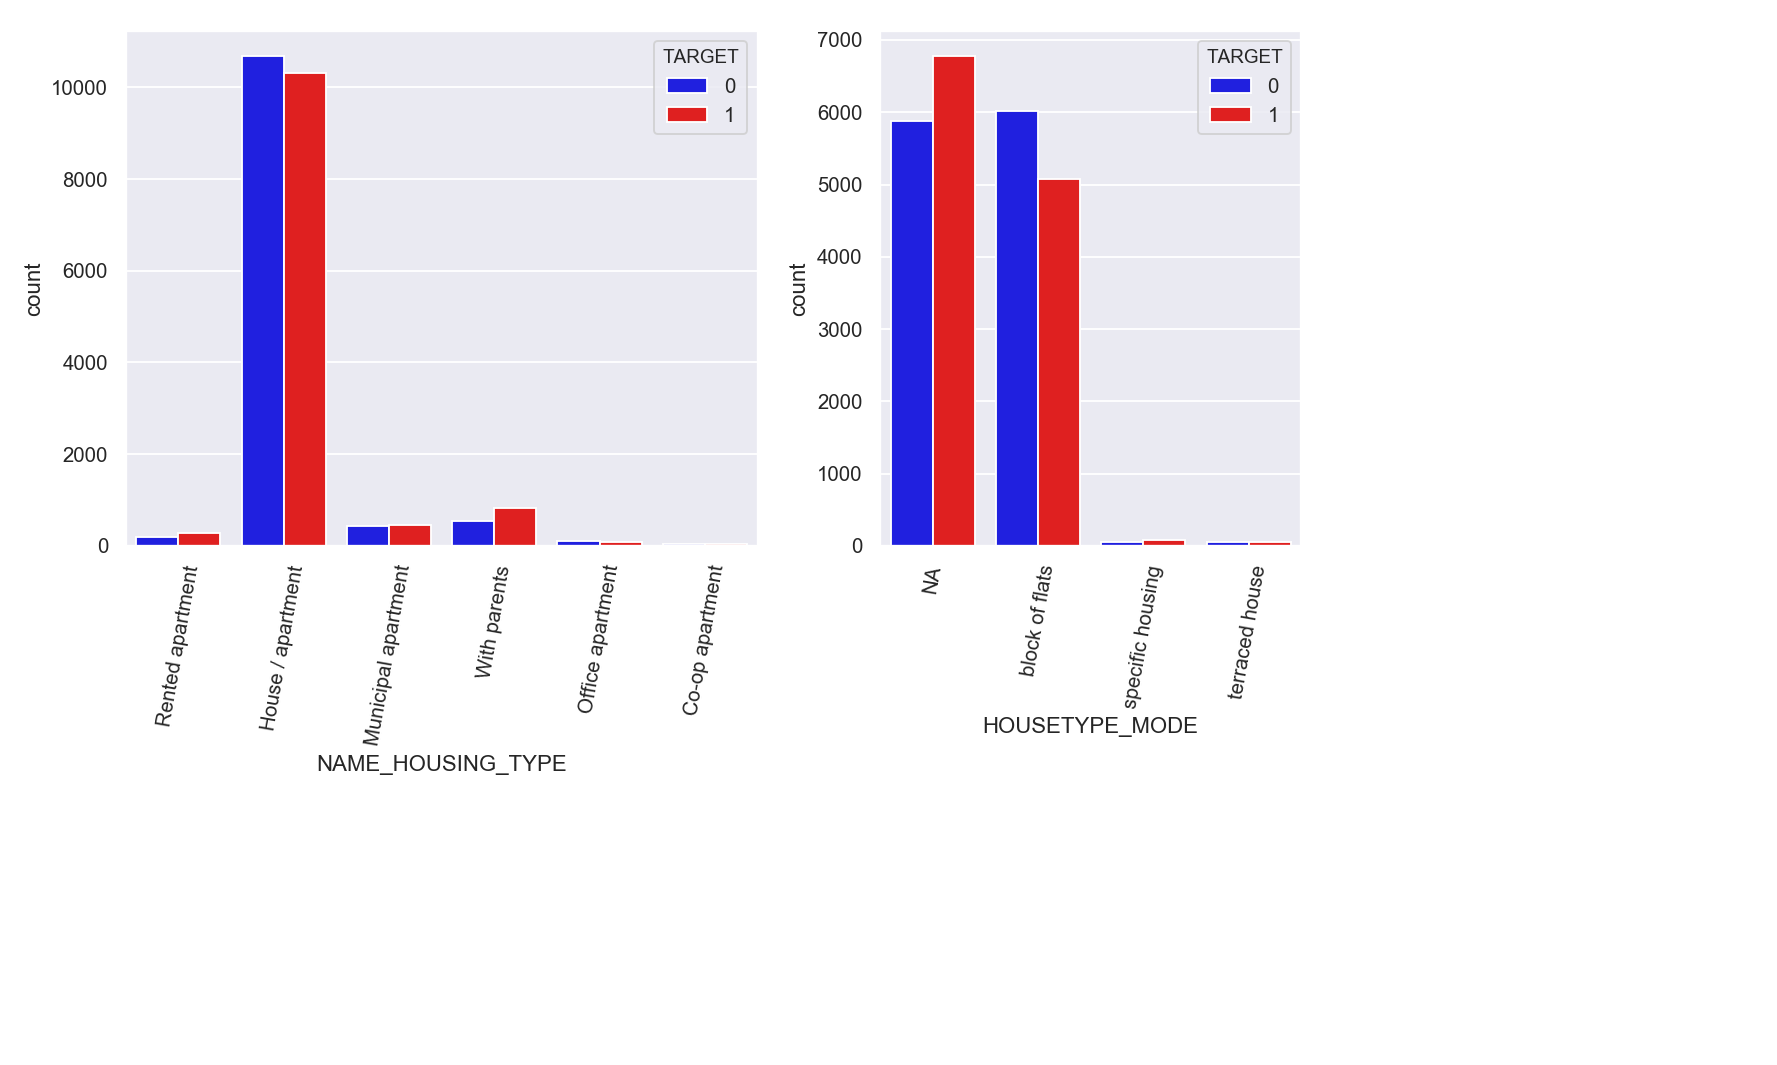

In [44]:
# PLOT CATEGORICAL FEATURES BINNED
# DROPPING THAT DAMN 365243 for now !! (defined above)
# TAKES A LONG TIME!!

# get categorical features
this_df = this_sample
feats = ['NAME_HOUSING_TYPE','HOUSETYPE_MODE']

# number of values for each feature for plot sizing
ratios = [len(np.unique(this_df[f])) for f in feats]
tot_width = sum(ratios)*1

fig, axs = plt.subplots(nrows = 1,
                        ncols = len(feats),
                        gridspec_kw = {'width_ratios':ratios},
                        figsize = (tot_width, 6));

for f, a in zip(feats, range(len(feats))):
    g = sns.countplot(x = f,
                      hue = "TARGET", 
                      data = this_df, 
                      palette = ['blue','red'], 
                      #bw = 1,
                      ax = axs[a]
                       );
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation = 80);

plt.tight_layout()

## some facetgrid plots

In [69]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(application_train_df, 24000, 0)

<IPython.core.display.Javascript object>


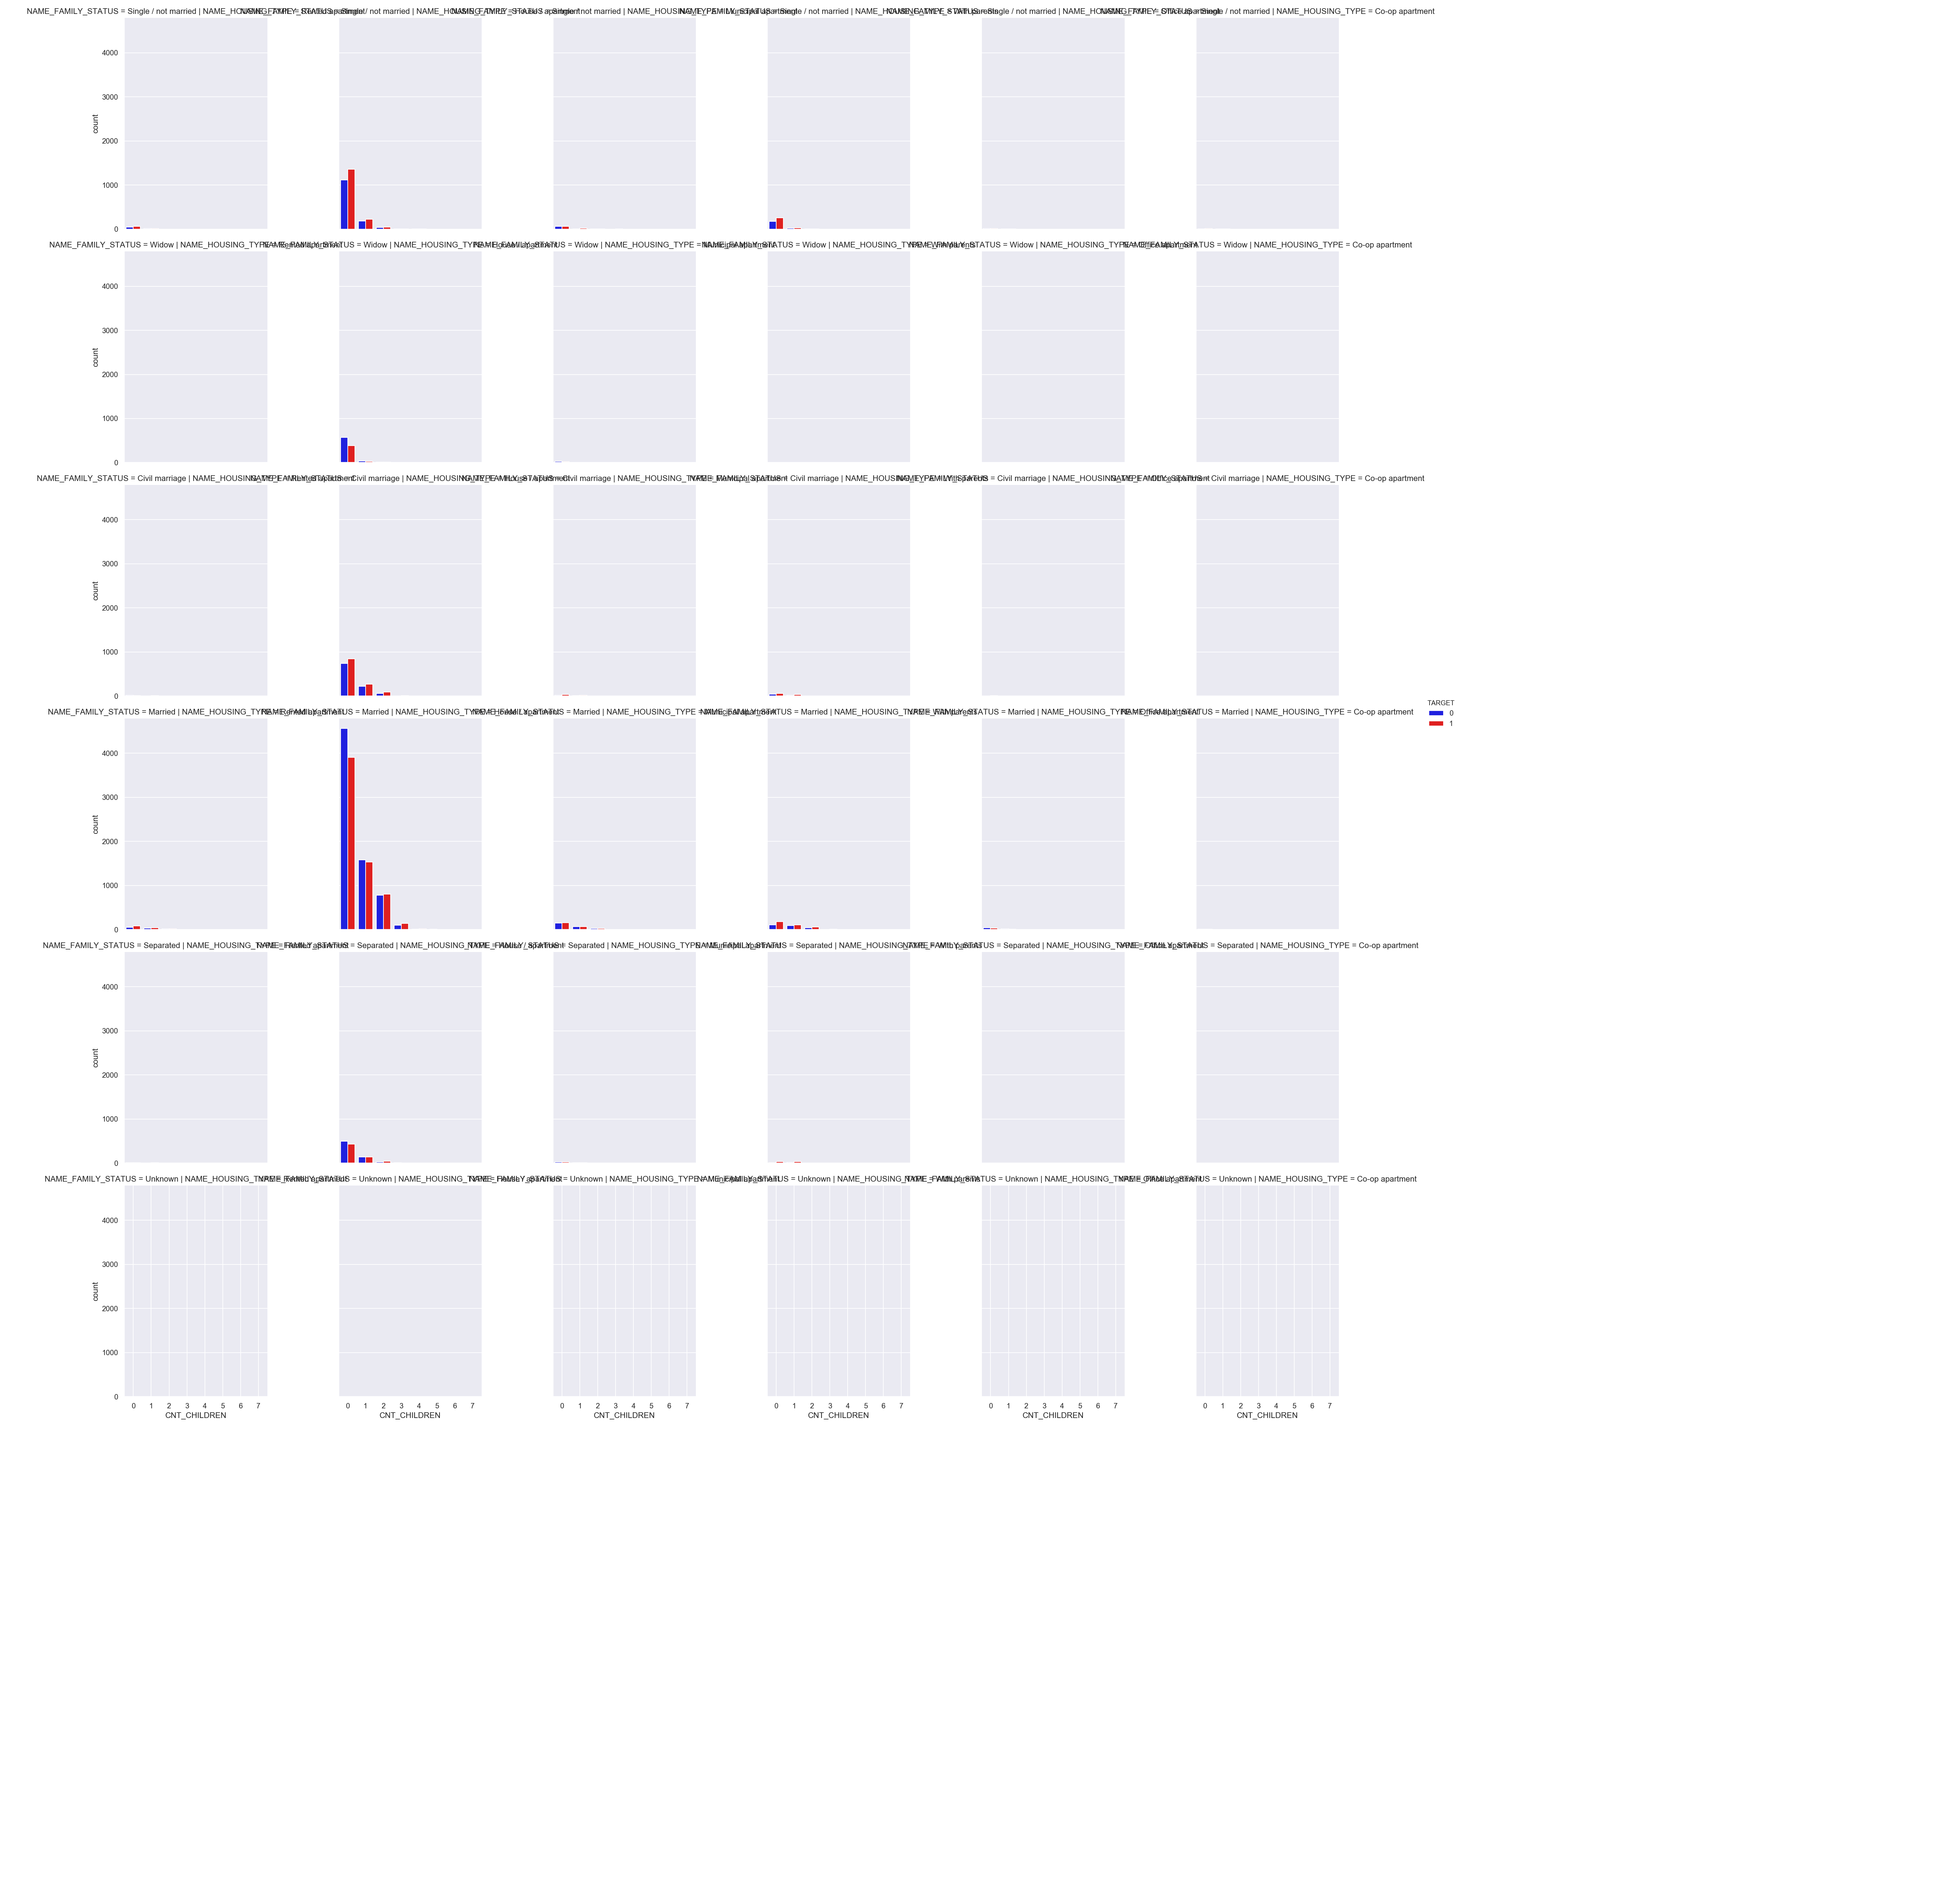

/anaconda/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


In [72]:
datt = this_sample#['LIVE_CITY_NOT_WORK_CITY']

#first_sample[']
# plt.figure()
# sns.countplot(data = datt, x = 'CODE_GENDER', hue='TARGET', palette=['red','blue'])

sns.catplot(data = datt,
            kind = 'count',
            x = 'CNT_CHILDREN', 
            col ='NAME_HOUSING_TYPE',
            row= 'NAME_FAMILY_STATUS',
            hue='TARGET',
            palette=['blue','red']) #[datt.notnull()]
plt.tight_layout()

## nan verse numbers recorded - no information

In [7]:
def record_num_nan(x):
    if np.isnan(x) == True:
        return 'NAN'
    if np.isnan(x) == False:
        return 'num'

In [8]:
all_types = application_train_df.dtypes
float_and_int_types = list(  set(list(all_types[all_types =='int64'].index) + list(all_types[all_types =='float64'].index)) - {'TARGET'})

In [9]:
nan_cats_df = application_train_df[float_and_int_types].applymap(record_num_nan)

In [17]:
nan_cats_df = pd.concat(  [application_train_df['TARGET'],nan_cats_df]  ,axis = 1, join = 'inner')

In [19]:
# get a random sample bc full sample is too much to plot
nan_cats_df_sample = balanced_sample(nan_cats_df, 24000, 0)

In [29]:
slice_at = 25

<IPython.core.display.Javascript object>


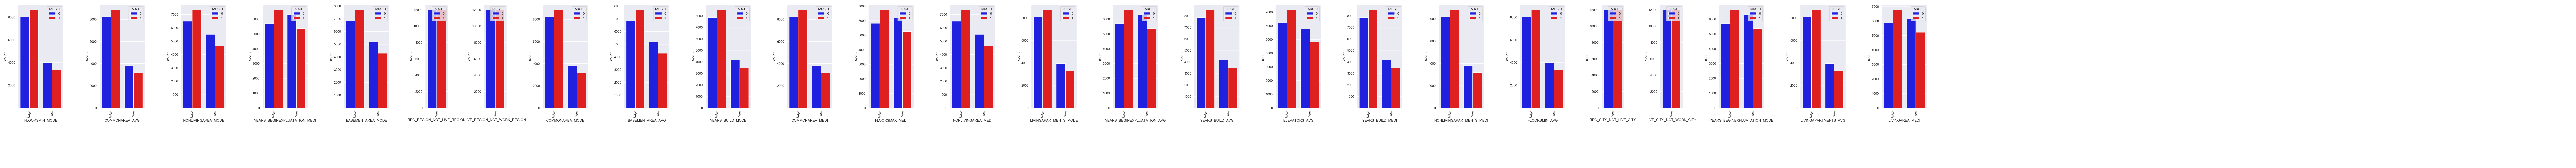

In [30]:
# PLOT CATEGORICAL FEATURES BINNED
# DROPPING THAT DAMN 365243 for now !! (defined above)
# TAKES A LONG TIME!!

# get categorical features
this_df = nan_cats_df_sample
feats = list(  set(list(this_df.columns)) - {'TARGET'})[:slice_at]

# number of values for each feature for plot sizing
ratios = [len(np.unique(this_df[f])) for f in feats]
tot_width = sum(ratios)*2

fig, axs = plt.subplots(nrows = 1,
                        ncols = len(feats),
                        gridspec_kw = {'width_ratios':ratios},
                        figsize = (tot_width, 6));

for f, a in zip(feats, range(len(feats))):
    g = sns.countplot(x = f,
                      hue = "TARGET", 
                      data = this_df, 
                      palette = ['blue','red'], 
                      #bw = 1,
                      ax = axs[a]
                       );
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation = 80);

plt.tight_layout()

<IPython.core.display.Javascript object>


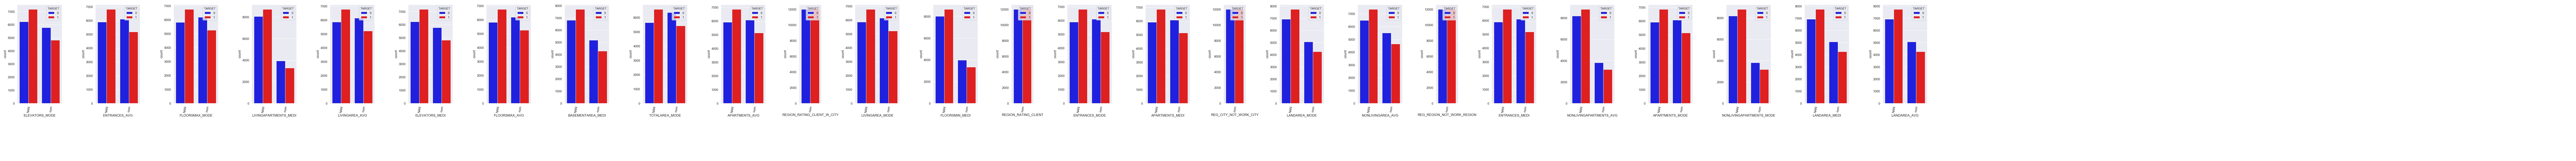

In [31]:
# PLOT CATEGORICAL FEATURES BINNED
# DROPPING THAT DAMN 365243 for now !! (defined above)
# TAKES A LONG TIME!!

# get categorical features
this_df = nan_cats_df_sample
feats = list(  set(list(this_df.columns)) - {'TARGET'})[slice_at:]

# number of values for each feature for plot sizing
ratios = [len(np.unique(this_df[f])) for f in feats]
tot_width = sum(ratios)*2

fig, axs = plt.subplots(nrows = 1,
                        ncols = len(feats),
                        gridspec_kw = {'width_ratios':ratios},
                        figsize = (tot_width, 6));

for f, a in zip(feats, range(len(feats))):
    g = sns.countplot(x = f,
                      hue = "TARGET", 
                      data = this_df, 
                      palette = ['blue','red'], 
                      #bw = 1,
                      ax = axs[a]
                       );
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation = 80);

plt.tight_layout()

In [36]:
del nan_cats_df_sample
del all_types

## floats

In [8]:
all_types = application_train_df.dtypes
float_types =   list(all_types[all_types =='float64'].index)

In [9]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(application_train_df, 24000, 0)

In [10]:
slice_at = 20

<IPython.core.display.Javascript object>


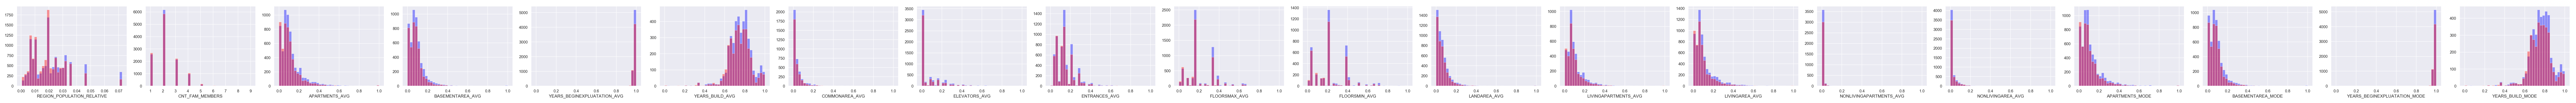

In [11]:
# PLOT FIRST HALF OF FLOAT FEATURES

my_list = float_types[:slice_at]
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):

    dat = this_sample[  (this_sample[f].notna())][f]
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]
    
    my_bins = np.histogram(dat, 40)[1]
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)#, bw =bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)#, bw =bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
   # g0.set_xticklabels(g.get_xticklabels(),rotation = 80)

plt.tight_layout()

In [21]:
this_sample.shape

(24000, 66)

In [19]:
this_sample['BASEMENTAREA_AVG'].isnull().sum(axis=0)

14521

<IPython.core.display.Javascript object>


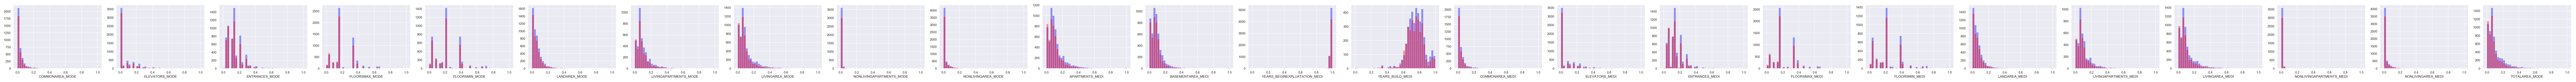

In [12]:
# PLOT SECOND HALF OF FLOAT FEATURES

my_list = float_types[slice_at:]
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):

    dat = this_sample[  (this_sample[f].notna())][f]
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]
    
    my_bins = np.histogram(dat, 40)[1]
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)#, bw =bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)#, bw =bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
   # g0.set_xticklabels(g.get_xticklabels(),rotation = 80)

plt.tight_layout()

In [ ]:
this_sample['']

<IPython.core.display.Javascript object>


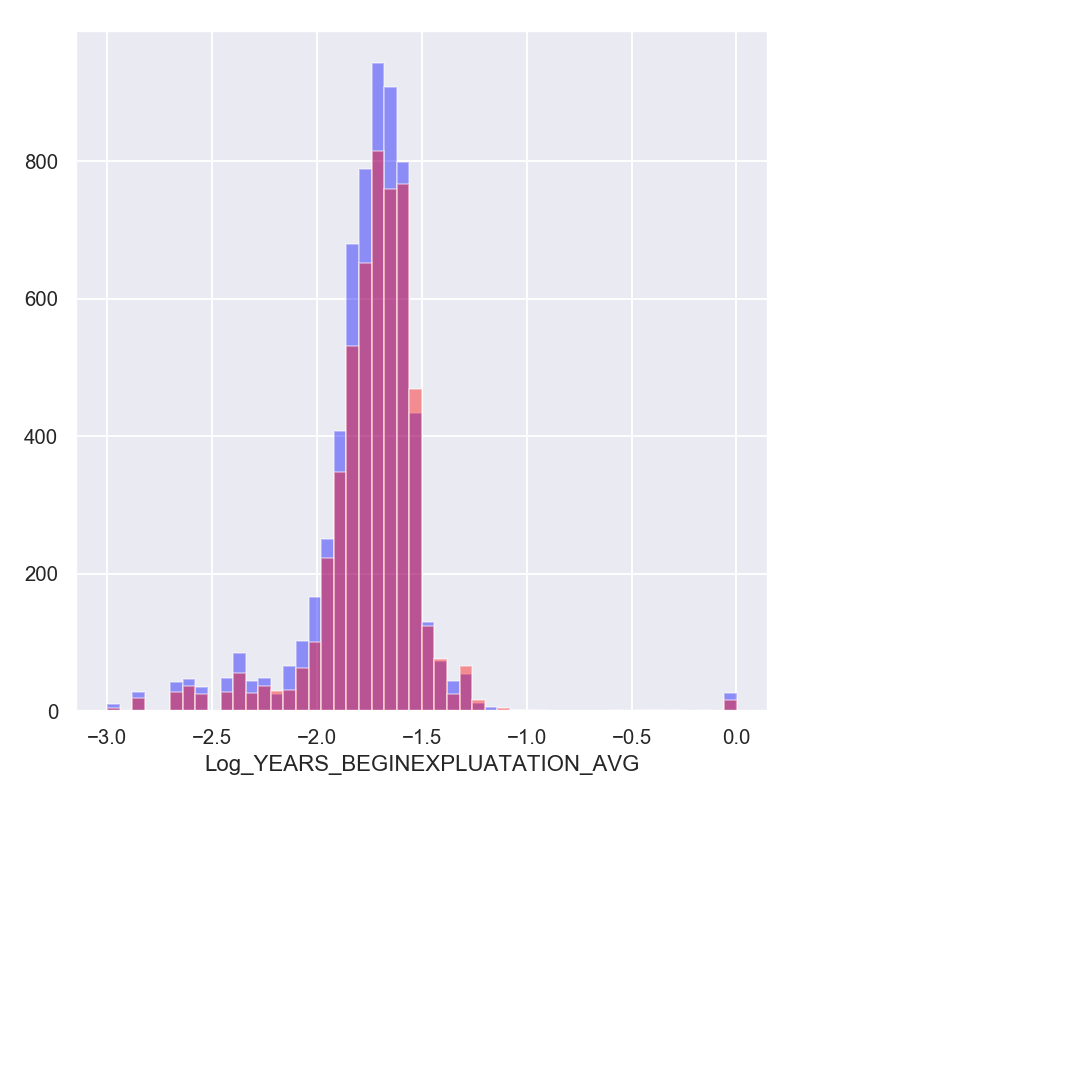

In [51]:
old_feat = 'YEARS_BEGINEXPLUATATION_AVG'#'LANDAREA_MODE'
#'LIVINGAPARTMENTS_AVG'#'LANDAREA_AVG'#'YEARS_BEGINEXPLUATATION_AVG'#'YEARS_BUILD_MODE'#LANDAREA_AVG, LIVINGAPARTMENTS_MODE , APARTMENTS_MODE 'AMT_GOODS_PRICE'

this_feat = 'Log_'+ old_feat

this_sample[this_feat] = np.log10(1.001-this_sample[old_feat])
                                #np.log10(this_sample[old_feat]+1) 
                            #np.log10(this_sample['AMT_INCOME_TOTAL']+1)
                            #np.log10(+this_sample[old_feat]/this_sample['AMT_INCOME_TOTAL']+1)  
                            # this_sample[old_feat]/this_sample['AMT_INCOME_TOTAL'] #np.log10(+this_sample[old_feat]+1)
                                #np.log10(+this_sample[old_feat]/this_sample['AMT_INCOME_TOTAL']+1)  
fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize = (6,  6));

dat = this_sample[(this_sample[this_feat].notna())][this_feat]
dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[this_feat].notna())][this_feat]
dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[this_feat].notna())][this_feat]
    
    #divv = 40
my_bins = np.histogram(dat.values, bins = 50)[1]  
#bw_0 = np.std(dat_0)/3
#bw_1 = np.std(dat_1)/3
    
g0 = sns.distplot(dat_0, color = 'blue', ax = axs, kde = False, bins = my_bins)#, bw = bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
g1 = sns.distplot(dat_1, color = 'red',  ax = axs,  kde = False, bins = my_bins)#, bw = bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
# g0.set_xticklabels(g.get_xticklabels(),rotation = 80)
#g1.set_yscale('log')
#g1.set_xscale('log')
#plt.xlim(0,5)

plt.tight_layout()

In [31]:
this_sample['YEARS_BEGINEXPLUATATION_AVG']

SK_ID_CURR
100019       NaN
100031    0.9732
100035    0.9697
100036    0.9901
100045    0.9851
100055       NaN
100064       NaN
100096       NaN
100130    0.9881
100160       NaN
100181    0.9757
100186       NaN
100190    0.9891
100192       NaN
100224    0.9826
100229       NaN
100235    0.9762
100239       NaN
100243       NaN
100246    0.9826
100266    0.9737
100295    0.9916
100301    0.4933
100332    0.9801
100336    0.9801
100350       NaN
100378       NaN
100387    0.9796
100401    0.9836
100417       NaN
           ...  
455876    0.9771
455900    0.9767
455924    0.9985
455964       NaN
455983       NaN
456000       NaN
456005       NaN
456034       NaN
456036       NaN
456052       NaN
456078       NaN
456088    0.9796
456102       NaN
456112       NaN
456121       NaN
456129       NaN
456140    0.9871
456147       NaN
456171    0.9846
456181       NaN
456184    0.9841
456186    0.9776
456190       NaN
456191       NaN
456215    0.9990
456217    0.9876
456225       NaN
456